In [1]:
#!pip freeze --user > requirements.txt
#!while read p; do pip install --user "${p}" --ignore-installed ; done <./requirements.txt
#!pip install -U scikit-learn
#!sudo pip install sklearn
#!conda update scikit-learn

# 2. Import libraries and modules
import numpy as np
#!pip install -U ggplot
from ggplot import *
#from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
#from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib
from sklearn import cross_validation

/gpfs/fs01/user/s03e-2037db58e169fd-84f656748d0c/.local/lib/python2.7/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/gpfs/fs01/user/s03e-2037db58e169fd-84f656748d0c/.local/lib/python2.7/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/gpfs/fs01/user/s03e-2037db58e169fd-84f656748d0c/.local/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
from io import StringIO
import requests
import json
import pandas as pd

# @hidden_cell
# This function accesses a file in your Object Storage. The definition contains your credentials.
# You might want to remove those credentials before you share your notebook.
def get_object_storage_file_with_credentials_7db59c5e102845a295fa6cc478a0f277(container, filename):
    """This functions returns a StringIO object containing
    the file content from Bluemix Object Storage."""

    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': 'member_4bcd1ecbb4e7d4249f9dadbfc85d90264c24f349','domain': {'id': '8f52255ee4dc4c0db1e290f2433b0de7'},
            'password': 'D0Px8lR.zhuvgPo['}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', container, '/', filename])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO(resp2.text)

TRAIN = pd.read_csv(get_object_storage_file_with_credentials_7db59c5e102845a295fa6cc478a0f277('ENTEL', 'REMOTE_PORTOUT_TRAIN_0.CSV'))
TRAIN.head()


,ID,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,...,VAR_186,VAR_187,VAR_188,VAR_189,VAR_190,VAR_191,VAR_192,VAR_193,VAR_194,FL_TARGET
0,10003847,3941,1,38,1,1470,19990,0,0,0,...,1.0,1.03,0.93,1.12,0.82,1.00,1.12,1.67,1.67,P
1,10019176,3945,1,38,1,1472,29990,0,0,0,...,1.0,0.96,0.77,0.87,0.77,1.00,0.87,1.00,1.00,P
2,10019424,3945,1,38,1,1472,29990,0,0,0,...,1.0,1.10,0.91,0.91,0.97,1.00,0.91,0.00,0.00,A
3,10022424,3835,3,38,1,1417,6990,0,0,0,...,1.0,1.00,0.99,1.10,1.00,1.00,1.06,1.67,1.67,A
4,10023637,4473,3,38,1,1736,13990,0,0,0,...,1.0,1.05,0.75,1.02,0.70,1.67,1.04,1.00,1.00,P


In [3]:
# 4. Split data into training and test sets
y_train = TRAIN.FL_TARGET
#print y
X_train = TRAIN.drop('FL_TARGET', axis=1)

#print X
##X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

In [4]:
MODELO_RF=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
 
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=2,
            oob_score=True, random_state=0, verbose=0, warm_start=False)

In [5]:
# 7. Tune model using cross-validation pipeline
#Correm
MODELO_RF.fit(X_train, y_train)

####

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=2,
            oob_score=True, random_state=0, verbose=0, warm_start=False)

In [6]:

TEST = pd.read_csv(get_object_storage_file_with_credentials_7db59c5e102845a295fa6cc478a0f277('ENTEL', 'REMOTE_PORTOUT_TEST_0.CSV'))
TEST.head()


,ID,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,...,VAR_186,VAR_187,VAR_188,VAR_189,VAR_190,VAR_191,VAR_192,VAR_193,VAR_194,FL_TARGET
0,10000428,3979,5,40,1,1489,20990,12,17639,12,...,1.00,1.0,1.68,0.64,0.69,0.64,0.78,1.03,1.0,A
1,10000485,4081,1,40,21,1540,9990,0,0,0,...,1.00,1.0,1.00,1.35,1.08,1.36,1.00,1.29,2.0,A
2,1000075,4599,2,162,1,1799,29990,9,17639,6,...,0.22,1.0,0.94,0.90,0.45,1.03,2.00,1.53,1.0,A
3,10001370,4599,6,40,1,1799,29990,17,17639,2,...,1.00,1.0,1.51,1.04,0.00,1.30,1.64,1.43,2.0,A
4,1000199,4081,2,162,1,1540,9990,0,0,0,...,1.00,1.0,1.00,1.23,1.17,1.18,1.00,0.94,2.0,A


In [7]:
X_TEST = TEST.drop('FL_TARGET', axis=1)
PRED = MODELO_RF.predict(X_TEST)
Y_TEST = TEST.FL_TARGET
pd.crosstab(Y_TEST, PRED, rownames=['actual'], colnames=['preds'])
#print Y_TEST

preds,A,P
actual,,
A,23569,2716
P,2138,832


In [8]:
from sklearn.metrics import roc_auc_score
print("precisión del modelo: {0: .2f}".format((Y_TEST == PRED).mean()))
#classifier = clf.fit(X_train, y_train)
#print classifier
PREDICCIONES_PBB = MODELO_RF.predict_proba(X_TEST)
print(PREDICCIONES_PBB)



precisión del modelo:  0.83
[[ 0.76409945  0.23590055]
 [ 0.68473697  0.31526303]
 [ 0.75555619  0.24444381]
 ..., 
 [ 0.81742506  0.18257494]
 [ 0.65735667  0.34264333]
 [ 0.60259151  0.39740849]]


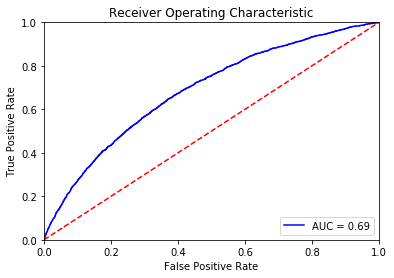

In [9]:
from sklearn import metrics

preds = MODELO_RF.predict_proba(X_TEST)[:,1]
#print preds
#print TEST.FL_TARGET
   
    
# calculate the fpr and tpr for all thresholds of the classification
#probs = model.predict_proba(X_test)
probs = MODELO_RF.predict_proba(X_TEST)
preds = probs[:,1]
#print preds
fpr, tpr, threshold = metrics.roc_curve(Y_TEST, preds,'P')
roc_auc = metrics.auc(fpr, tpr)



# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()




In [ ]:
metrics.auc(fpr, tpr)

In [ ]:
import numpy as np
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(Y_TEST, preds,'P')
print precision_recall_curve(Y_TEST, preds,'P') 

In [ ]:
plt.title('Receiver Operating Characteristic')
plt.plot(precision, recall, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Recall')
plt.xlabel('Precision')
plt.show()

In [ ]:
print(__doc__)

# Author: Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>
# License: BSD Style.

import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import calibration_curve


X_train = X_train
X_test = X_TEST
y_train = y_train
y_test = Y_TEST

# Create classifiers
lr = LogisticRegression()
gnb = GaussianNB()
svc = LinearSVC(C=1.0)
rfc = RandomForestClassifier(n_estimators=50)

X, y = datasets.make_classification(n_samples=100000, n_features=195,
                                    n_informative=2, n_redundant=2)
# #############################################################################
# Plot calibration plots

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(lr, 'Logistic'),
                  #(gnb, 'Naive Bayes'),
                  #(svc, 'Support Vector Classification'),
                  (rfc, 'Random Forest')]:
    clf.fit(X_train, y_train)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()